In [0]:
!pip install tensorflow==2.0.1

     |████████████████████████████████| 86.3MB 69kB/s 
     |████████████████████████████████| 3.8MB 36.5MB/s 
     |████████████████████████████████| 450kB 58.7MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
print(tf.__version__)


2.0.1


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [0]:
type(data)

sklearn.utils.Bunch

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data.data.shape

(569, 30)

In [0]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.target.shape

(569,)

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=D,),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)
print("Train score:", model.evaluate(X_train, Y_train))
print("Test score:", model.evaluate(X_test, Y_test))


Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 2ms/sample - loss: 1.4120 - accuracy: 0.1837 - val_loss: 1.2827 - val_accuracy: 0.2447
Epoch 2/100
381/381 [==============================] - 0s 101us/sample - loss: 1.3067 - accuracy: 0.2283 - val_loss: 1.1682 - val_accuracy: 0.3245
Epoch 3/100
381/381 [==============================] - 0s 97us/sample - loss: 1.2041 - accuracy: 0.2808 - val_loss: 1.0646 - val_accuracy: 0.3617
Epoch 4/100
381/381 [==============================] - 0s 93us/sample - loss: 1.1119 - accuracy: 0.3228 - val_loss: 0.9683 - val_accuracy: 0.4415
Epoch 5/100
381/381 [==============================] - 0s 94us/sample - loss: 1.0255 - accuracy: 0.3753 - val_loss: 0.8812 - val_accuracy: 0.4894
Epoch 6/100
381/381 [==============================] - 0s 97us/sample - loss: 0.9463 - accuracy: 0.4121 - val_loss: 0.8029 - val_accuracy: 0.5532
Epoch 7/100
381/381 [==============================] - 0s 91us/sample - loss: 

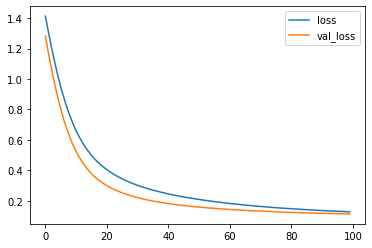

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


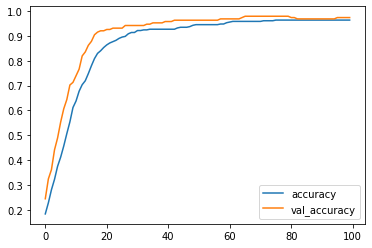

In [23]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [24]:
p = model.predict(X_test)
print(p)

[[8.8948679e-01]
 [9.2121732e-01]
 [9.4279730e-01]
 [9.9620587e-01]
 [9.8660421e-01]
 [1.5458465e-04]
 [4.2254949e-01]
 [8.6185437e-01]
 [9.7607148e-01]
 [2.5409716e-01]
 [9.6991658e-04]
 [9.6051836e-01]
 [4.9373546e-01]
 [9.3221211e-01]
 [9.9147487e-01]
 [2.5698304e-01]
 [1.0821819e-03]
 [7.3865056e-04]
 [1.5246868e-04]
 [9.8436213e-01]
 [2.2915810e-02]
 [2.5661314e-01]
 [8.6028963e-02]
 [4.7396719e-03]
 [6.8908042e-01]
 [9.9947393e-01]
 [9.5038152e-01]
 [1.0494947e-02]
 [1.8759701e-01]
 [5.0205171e-02]
 [9.8608041e-01]
 [9.5484924e-01]
 [1.3653070e-02]
 [5.2574277e-04]
 [9.9889892e-01]
 [9.9997509e-01]
 [9.9976826e-01]
 [8.9480305e-01]
 [9.5361316e-01]
 [9.8095018e-01]
 [9.8614264e-01]
 [9.5988035e-01]
 [9.9190283e-01]
 [9.7321951e-01]
 [9.9626255e-01]
 [8.3410501e-02]
 [9.7758925e-01]
 [3.9426449e-01]
 [3.5543501e-02]
 [9.1156363e-04]
 [9.9222159e-01]
 [9.8830521e-01]
 [7.4089313e-01]
 [2.0501852e-02]
 [7.7269375e-02]
 [8.6957425e-02]
 [4.8880160e-02]
 [9.9381495e-01]
 [9.8659539e-0

In [26]:
import numpy as np
p = np.round(p).flatten()
print(p)

[1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.]


In [27]:
print("Manually calculated accuracy:", np.mean(p==Y_test))
print("Evaluate output:", model.evaluate(X_test, Y_test))

Manually calculated accuracy: 0.973404255319149
188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
model.save('linearclassifier.h5')


In [29]:
!ls 

linearclassifier.h5  sample_data


In [30]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, Y_test)

188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.11366696655750275, 0.9734042]